In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# link to source code

https://github.com/juliafairbank7/juliafairbank7.github.io/tree/main/posts/logistic-regression-post

# Optimization of Logistic Regression

Logistic regression is a classifier that estimates the probability of something based on a given dataset of independent variables.

In this blog post, I will implement a simple gradient descent and a stochastic gradient descent and will compare their performance for training logistic regression.


# Applying Logistic Regression

Let's start by generating a dataset that we will use on our gradient descent and our stochastic gradient descent. 

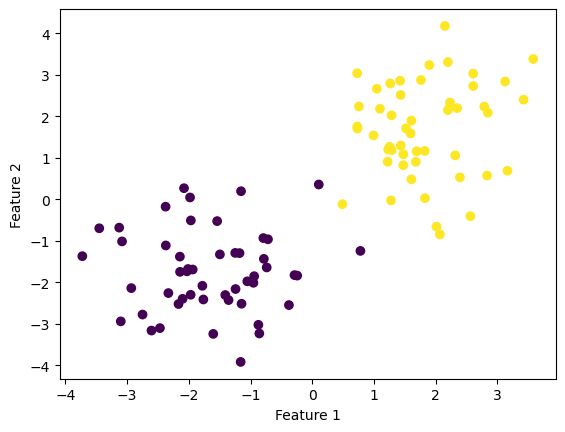

In [197]:
from LogisticRegression import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

np.seterr(all='ignore') 

np.random.seed(777)

X, y = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig2 = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


# Gradient Descent

When we call LR.fit(X, y), LR should have an instance variable of weights called w, which is a vector of weights, including the bias term. LR should have an instance variable called LR.loss_history which is a list of the evolution of the loss over the training period, and an instance variable called LR.score_history, which is a list of the evolution of the score over the training period.

Let's see how this works on our dataset.

Text(0.5, 1.0, 'Testing Dataset')

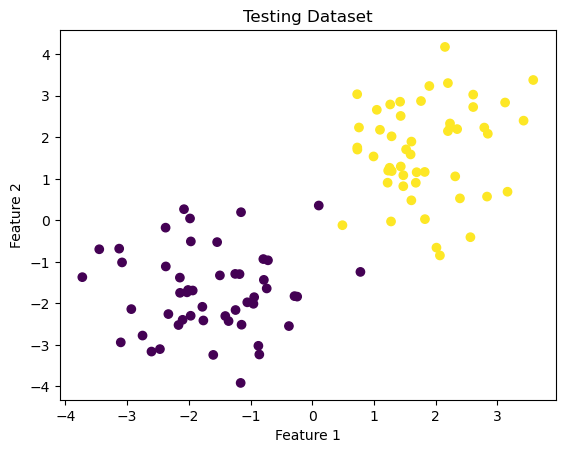

In [199]:
np.random.seed(777)

n = 100
p_features = 3

X1, y1 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Testing Dataset")

Text(0.5, 1.0, 'Gradient Descent')

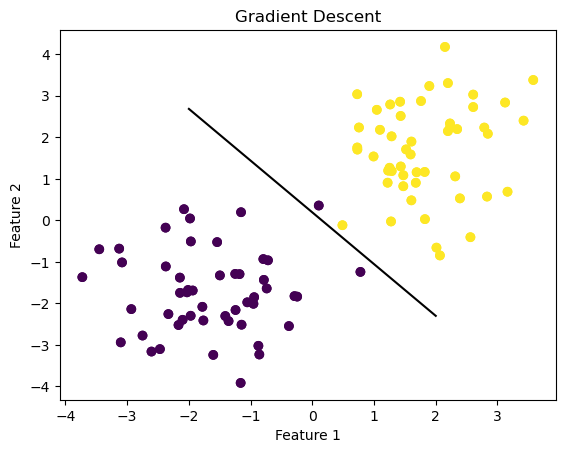

In [200]:
LR_f = LogisticRegression()
LR_f.fit(X, y, alpha = 0.1, max_epochs = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color = "black")

fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
fig1 = draw_line(LR_f.w_hat, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Gradient Descent")

As you can see, our simple gradient descent has drawn its classifying line to separate the two features. Let's see what the loss and score values look like.

In [201]:
print(LR_f.loss_history[-3])
print(LR_f.score_history[-1])

0.02319692785879772
0.99


We have a low loss and high score, meaning this line is a good strong separating line for logisitic regression. 

Now, let's compare this with the stochastic gradient descent. 

# Stochastic Gradient Descent

LogisticRegression.fit_stochastic(X, y) is an alternative version of the fit() method which computes a stochastic gradient by picking a random subset, computing the stochastic gradient, performing an update, then repeating. When LR.fit_stochastic(X, y) is called, LR should have an instance variable of weights called w, which is a vector of weights, including the bias term b. LR should have an instance variable called LR.loss_history which is a list of the evolution of the loss over the training period, and an instance variable called LR.score_history, which is a list of the evolution of the score over the training period.

# Testing Stochastic

Again, let's start by re-generating that same random dataset. 

Text(0.5, 1.0, 'Testing Dataset')

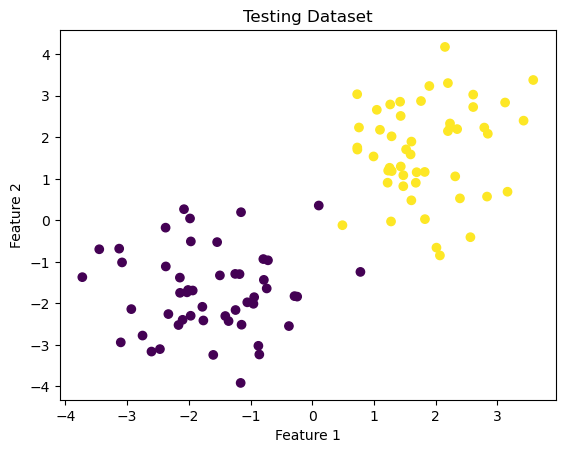

In [202]:
np.random.seed(777)

X2, y2 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Testing Dataset")

Text(0.5, 1.0, 'Stochastic Gradient Descent')

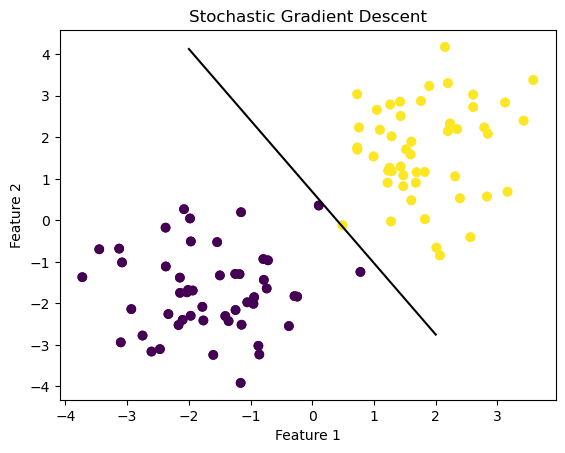

In [203]:
LR_s = LogisticRegression()
LR_s.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

fig = plt.scatter(X[:,0], X[:,1], c = y)

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color = "black")

fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
fig2 = draw_line(LR_s.w_hat, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Stochastic Gradient Descent")

As you can see, stochastic gradient descent has drawn its line of best fit to separate the two features. Let's see the score and loss values. We'll look at three of the loss values to see how it changes over iterations. 

In [204]:
print(LR_s.loss_history[-3])
print(LR_s.loss_history[-2])
print(LR_s.loss_history[-1])
print(LR_s.score_history[-1])

0.014117604281679486
0.014115400515806372
0.014113204314421224
1.0


Again, we have very low loss values that get smaller over iterations, and a perfect score, making the stochastic gradient descent a great classifier that had better results classifying this dataset than the simple gradient descent. 



For sake of visualization and comparision, let's plot the two fit methods on the same graph.

# Comparison Plotting

Text(0.5, 1.0, 'Testing Dataset')

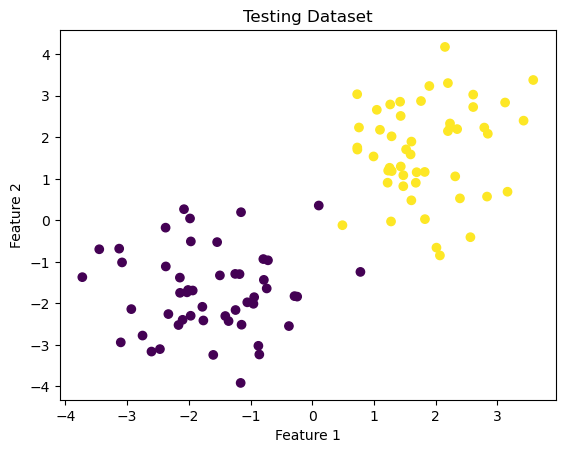

In [207]:
np.random.seed(777)

X3, y3 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig3 = plt.scatter(X3[:,0], X3[:,1], c = y3)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Testing Dataset")

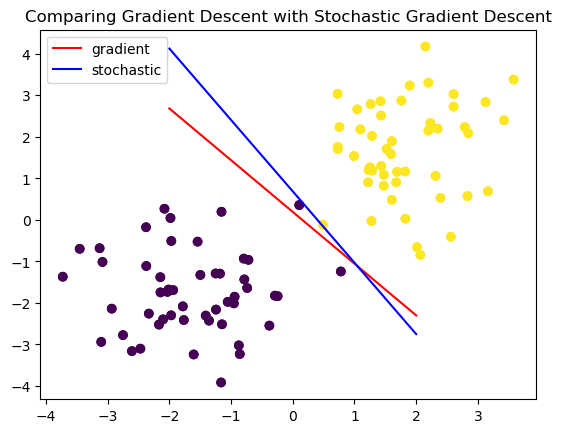

In [208]:
LR_f_b = LogisticRegression() #red
LR_f_b.fit(X3, y3, alpha = 0.1, max_epochs = 1000)

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color = "red", label = 'gradient')

fig3 = plt.scatter(X3[:,0], X3[:,1], c = y3)
fig3 = draw_line(LR_f_b.w_hat, -2, 2)


LR_s_b = LogisticRegression() #blue
LR_s_b.fit_stochastic(X3, y3, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color="blue", label='stochastic')

fig3 = plt.scatter(X3[:,0], X3[:,1], c = y3)
fig3 = draw_line(LR_s.w_hat, -2, 2)
plt.title("Comparing Gradient Descent with Stochastic Gradient Descent")

legend = plt.legend() 


Text(0.5, 1.0, 'Comparing Loss History Across Fit Methods')

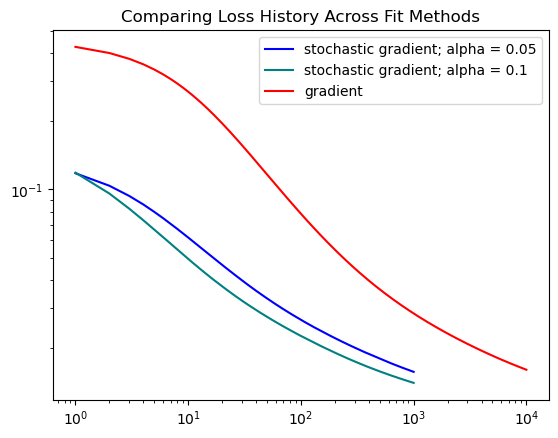

In [209]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, color = "blue", label = "stochastic gradient; alpha = 0.05")

LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, color = "teal", label = "stochastic gradient; alpha = 0.1")

LR.fit(X2, y2, alpha = .05, max_epochs = 10000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, color = "red", label = "gradient")

plt.loglog()

legend = plt.legend() 
plt.title("Comparing Loss History Across Fit Methods")

From this graph, we can see that the stochastic method converges faster than gradient descent with a steeper decline. The gradient method takes longer and requires more epochs to find a good solution. 

# Experimenting

Let's try experimenting with increasing our alpha value.


Text(0.5, 1.0, 'Testing Dataset')

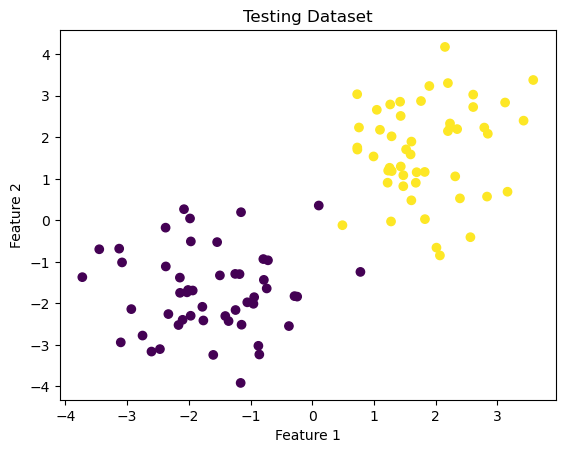

In [211]:
np.random.seed(777)

X4, y4 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig4 = plt.scatter(X4[:,0], X4[:,1], c = y4)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Testing Dataset")

Text(0.5, 1.0, 'Experimenting with Large Alpha Value')

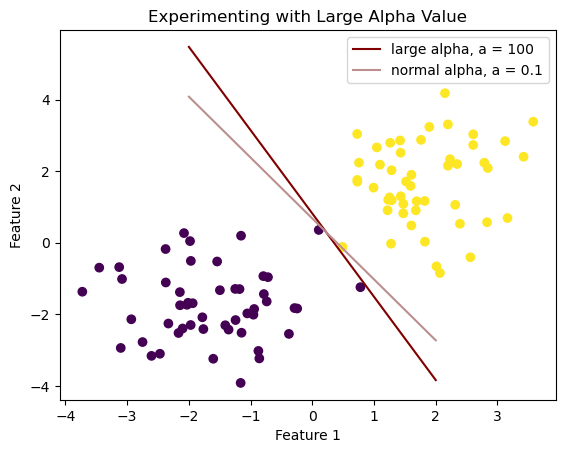

In [212]:
#large alpha value
LR_f_a_large = LogisticRegression()
LR_f_a_large.fit(X4, y4, alpha = 100, max_epochs = 10000)

#normal alpha value
LR_f_a_norm = LogisticRegression()
LR_f_a_norm.fit(X4, y4, alpha = .1, max_epochs = 10000)

fig4 = plt.scatter(X4[:,0], X4[:,1], c = y4)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color="maroon", label='large alpha, a = 100')

#alpha = 200
fig4 = draw_line(LR_f_a_large.w_hat, -2, 2)

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color="rosybrown", label='normal alpha, a = 0.1')
    
#alpha = 0.01
fig4 = draw_line(LR_f_a_norm.w_hat, -2, 2)

legend = plt.legend() 
plt.title("Experimenting with Large Alpha Value")



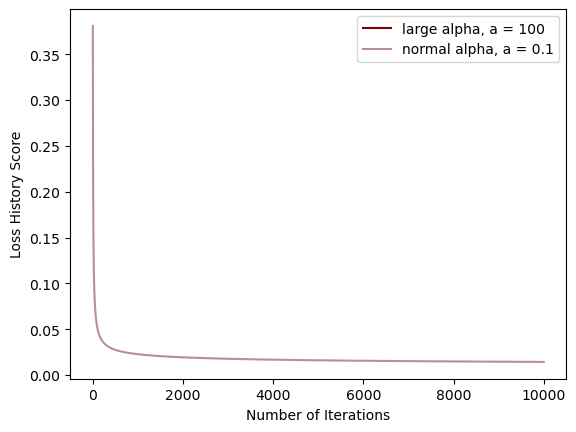

In [213]:
xlab = plt.xlabel("Number of Iterations")
ylab = plt.ylabel("Loss History Score")

num_steps1 = len(LR_f_a_large.loss_history)
plt.plot(np.arange(num_steps1) + 1, LR_f_a_large.loss_history, color = "maroon", label = 'large alpha, a = 100')

num_steps2 = len(LR_f_a_norm.loss_history)
plt.plot(np.arange(num_steps2) + 1, LR_f_a_norm.loss_history, color = "rosybrown", label = 'normal alpha, a = 0.1')

legend = plt.legend() 

# Experimenting with Non-Linearly Separable Data

We've seen how our simple gradient descent and stochtastic gradient descent work on linearly separable data, but let's see how they compare on non-linearly separable data. 

First, let's generate some non-linearly separable data.

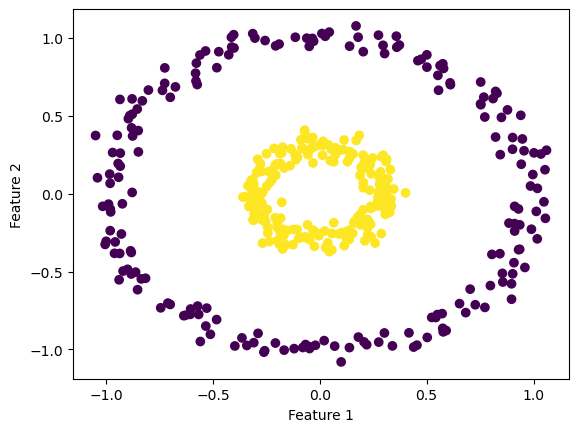

In [214]:
from sklearn.datasets import make_circles

X_c, y_c = make_circles(n_samples=400, factor=.3, noise=.05)

fig_c = plt.scatter(X_c[:,0], X_c[:,1], c = y_c)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

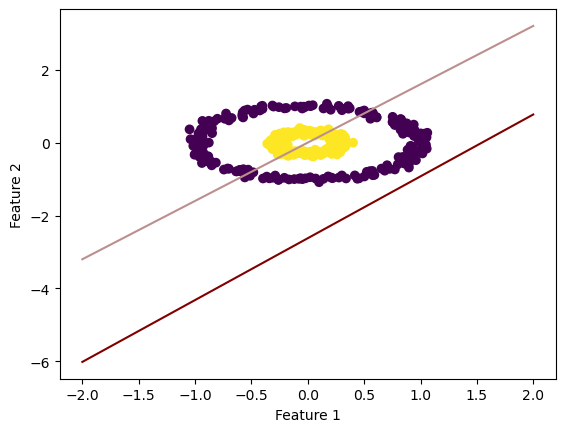

In [216]:
LR_f_NLS_a_large = LogisticRegression()
LR_f_NLS_a_large.fit(X_c, y_c, alpha = 100, max_epochs = 10000)

LR_f_NLS_a_norm = LogisticRegression()
LR_f_NLS_a_norm.fit(X_c, y_c, alpha = 0.1, max_epochs = 10000)

fig_c = plt.scatter(X_c[:,0], X_c[:,1], c = y_c)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color="maroon", label='large alpha, a = 100')

fig_c = draw_line(LR_f_NLS_a_large.w_hat, -2, 2)

def draw_line(w_hat, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w_hat[0]*x + w_hat[2])/w_hat[1]
    plt.plot(x, y, color="rosybrown", label='normal alpha, a = 0.1')

fig_c = draw_line(LR_f_NLS_a_norm.w_hat, -2, 2)


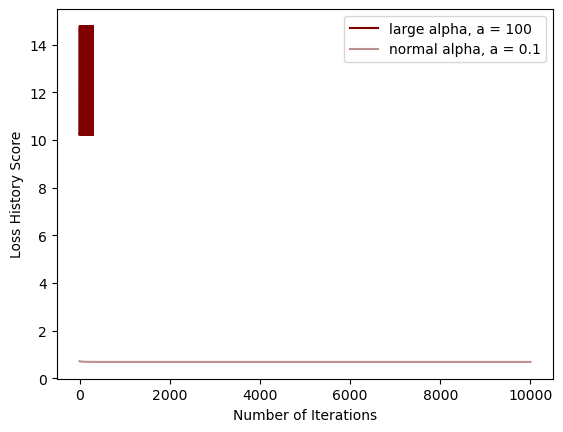

In [217]:
xlab = plt.xlabel("Number of Iterations")
ylab = plt.ylabel("Loss History Score")

num_steps1 = len(LR_f_NLS_a_large.loss_history)
plt.plot(np.arange(num_steps1) + 1, LR_f_NLS_a_large.loss_history, color = "maroon", label = 'large alpha, a = 100')

num_steps2 = len(LR_f_NLS_a_norm.loss_history)
plt.plot(np.arange(num_steps2) + 1, LR_f_NLS_a_norm.loss_history, color = "rosybrown", label = 'normal alpha, a = 0.1')

legend = plt.legend() 

As you can see, the large alpha doesn't appear to work in the way it should (converges before it begins), while the normal alpha seems to separate the features with a low-ish loss score.

# Experimenting with Batch Size

Text(0.5, 1.0, 'Testing Dataset')

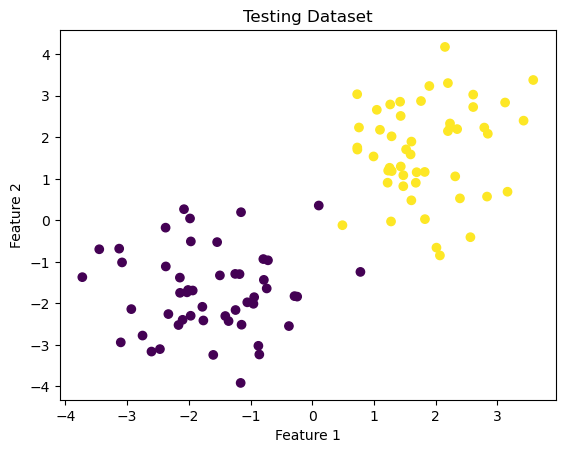

In [218]:
np.random.seed(777)

X5, y5 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig5 = plt.scatter(X5[:,0], X5[:,1], c = y5)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Testing Dataset")

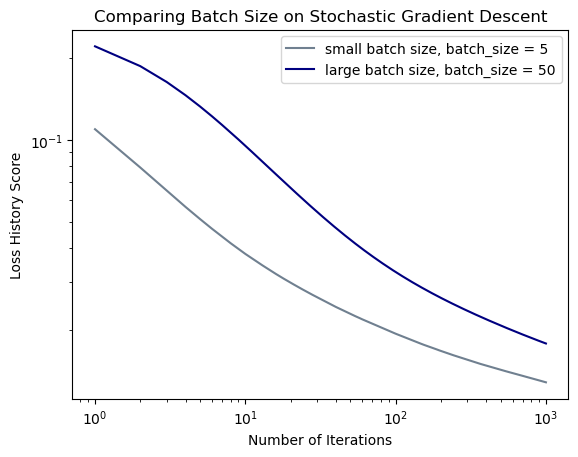

In [219]:
LR_smallBatch = LogisticRegression()
LR_smallBatch.fit_stochastic(X5, y5, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 5, 
                  alpha = .1) 

num_steps = len(LR_smallBatch.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_smallBatch.loss_history, color = "slategray", label = "small batch size, batch_size = 5")

LR_largeBatch = LogisticRegression()
LR_largeBatch.fit_stochastic(X5, y5, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 50, 
                  alpha = .1) 

num_steps = len(LR_largeBatch.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_largeBatch.loss_history, color = "navy", label = "large batch size, batch_size = 50")

plt.loglog()

xlab = plt.xlabel("Number of Iterations")
ylab = plt.ylabel("Loss History Score")
plt.title("Comparing Batch Size on Stochastic Gradient Descent")

legend = plt.legend() 

In this experiment, you can see that the larger batch size converges at a faster rate than the small batch size. However, they both appear converge at the same amount of epochs. 